![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

## Objetivos

Utilize your unsupervised learning skills to clusters in the penguins dataset!

Import, investigate and pre-process the "penguins.csv" dataset.
Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns (transform non-numeric in numeric with encoding).

In [32]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


# Minha solução:



## Discussão do Problema

O problema proposto busca classificar espécies distintas de penguins baseados em um dataset contendo **apenas features**. Trata-se portanto de um problema de classificação não supervisionado, sendo o objetivo a definição de labels que definem diferentes espécies de penguins a partir de clusterização (Algoritmo Não-Supervisionado). 

Em problemas de ML, comumente é interessante realizar padronização (standardization) nas variáveis, principalmente em algoritmos de aprendizado não supervisionado, com objetivo de padronizar as variáveis para que possuam características similares (média/variância). Essa medida irá melhorar o desempenho do modelo de clusterização, já que todas as variáveis possuirão pesos iguais na clusterização.

Por se tratar de uma clusterização, é necessário escolher um número de clusters. Essa escolha é realizada a partir da **Inércia**, que por sua vez é tomada a partir do ajuste de modelos ajustados variando números de clusters. O número de clusters para o modelo de clusterização é escolhido quando **a inércia do modelo deixa de apresentar uma variação grande com o aumento de clusters**. No caso, utilizaremos o KMeans para checar em qual quantidade de clusters teremos uma redução significativa em relação à uma quantidade inferior, e utilizaremos esse ponto como corte.

Após selecionada o número de clusters, aplica-se o modelo de KMeans definitivamente, e levantam-se as informações de interesse. O problema pede para realizar o output de um DataFrame com nome `stat_penguins`, onde cada linha representa um cluster e as colunas são as features, com os valores sendo as médias do feature para aquele cluster. O dataframe `stat_penguins` não deverá apresentar nenhum valor não-numérico!

## Etapas propostas para alcançar a solução

- Passo 1: EDA

  - Verificar Missing Values -> existem?
  - Dados estão nos DTypes corretos?
  - Visualização dos dados -> Como a distribuição aparenta ser?

- Passo 2: Pre-processamento dos dados
  - Se houver dados categóricos, criar dummy_variables para treinamento do modelo não supervisionado!
  - Aplicar StandardScaler -> Padronizar dados de variáveis numéricas

- Passo 3: Definir quantidade de clusters

  - Realizar laço de repetição, onde serão fitados vários modelos KMeans com n_clusters distintos
  - A inércia de cada modelo de n_clusters distinto será armazenada
  - Realizar visualização da inércia de cada modelo para definir o número de clusters pelo método do cotovelo

- Passo 4: Aplicar modelo com n_clusters definido

  - Obter dataframe com label dos clusters 
  - Visualizar os clusters 

- Passo 5: Retornar dataset com o resultado esperado


## Etapa 1: Cleaning + EDA

In [33]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


### Procurando valores nulos e outliers

In [34]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


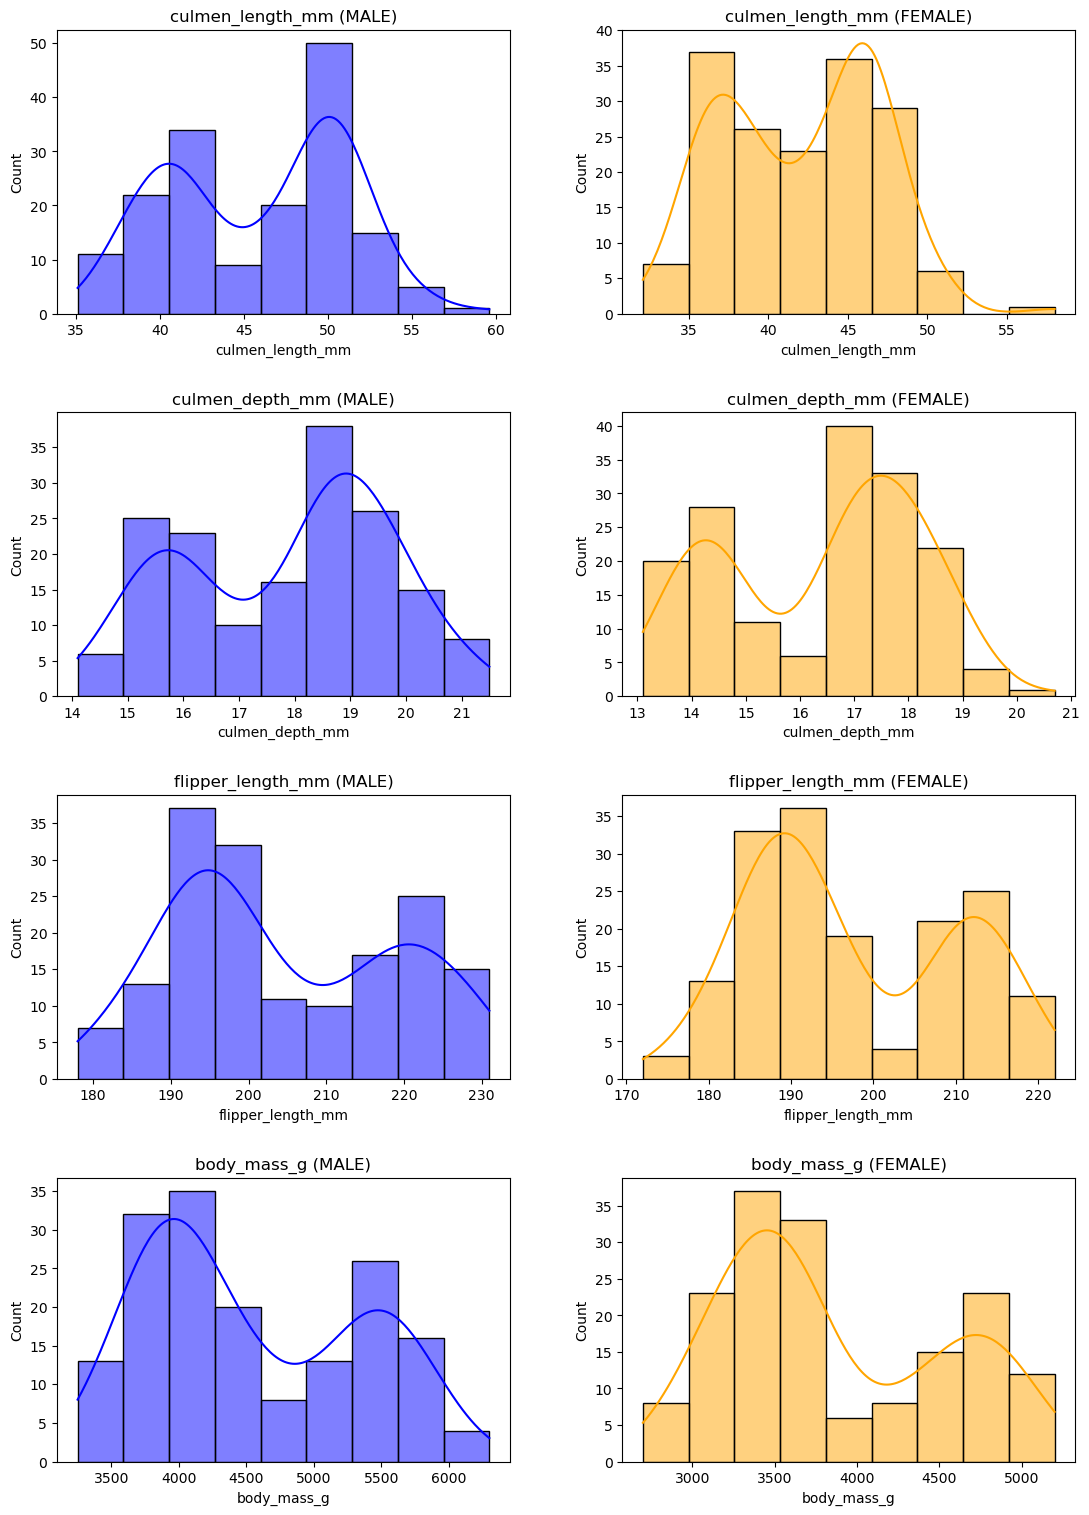

In [35]:
import seaborn as sns

# Usando seaborn para visualizar as distribuições
fig, axes = plt.subplots(len(features), penguins_df['sex'].nunique(), figsize=(12, 16))
fig.tight_layout(pad=5)

for i, feature in enumerate(features):
    for j, sex in enumerate(sex_categories):
        ax = axes[i, j]
        sex_penguins_subset = penguins_df[penguins_df['sex'] == sex]
        sns.histplot(sex_penguins_subset, x=feature, kde=True, ax=ax, color='blue' if sex == 'MALE' else 'orange')
        ax.set_title(f'{feature} ({sex})')

Distribuições aparentam ser bimodais em todas as características, tanto para Male quanto para Female.

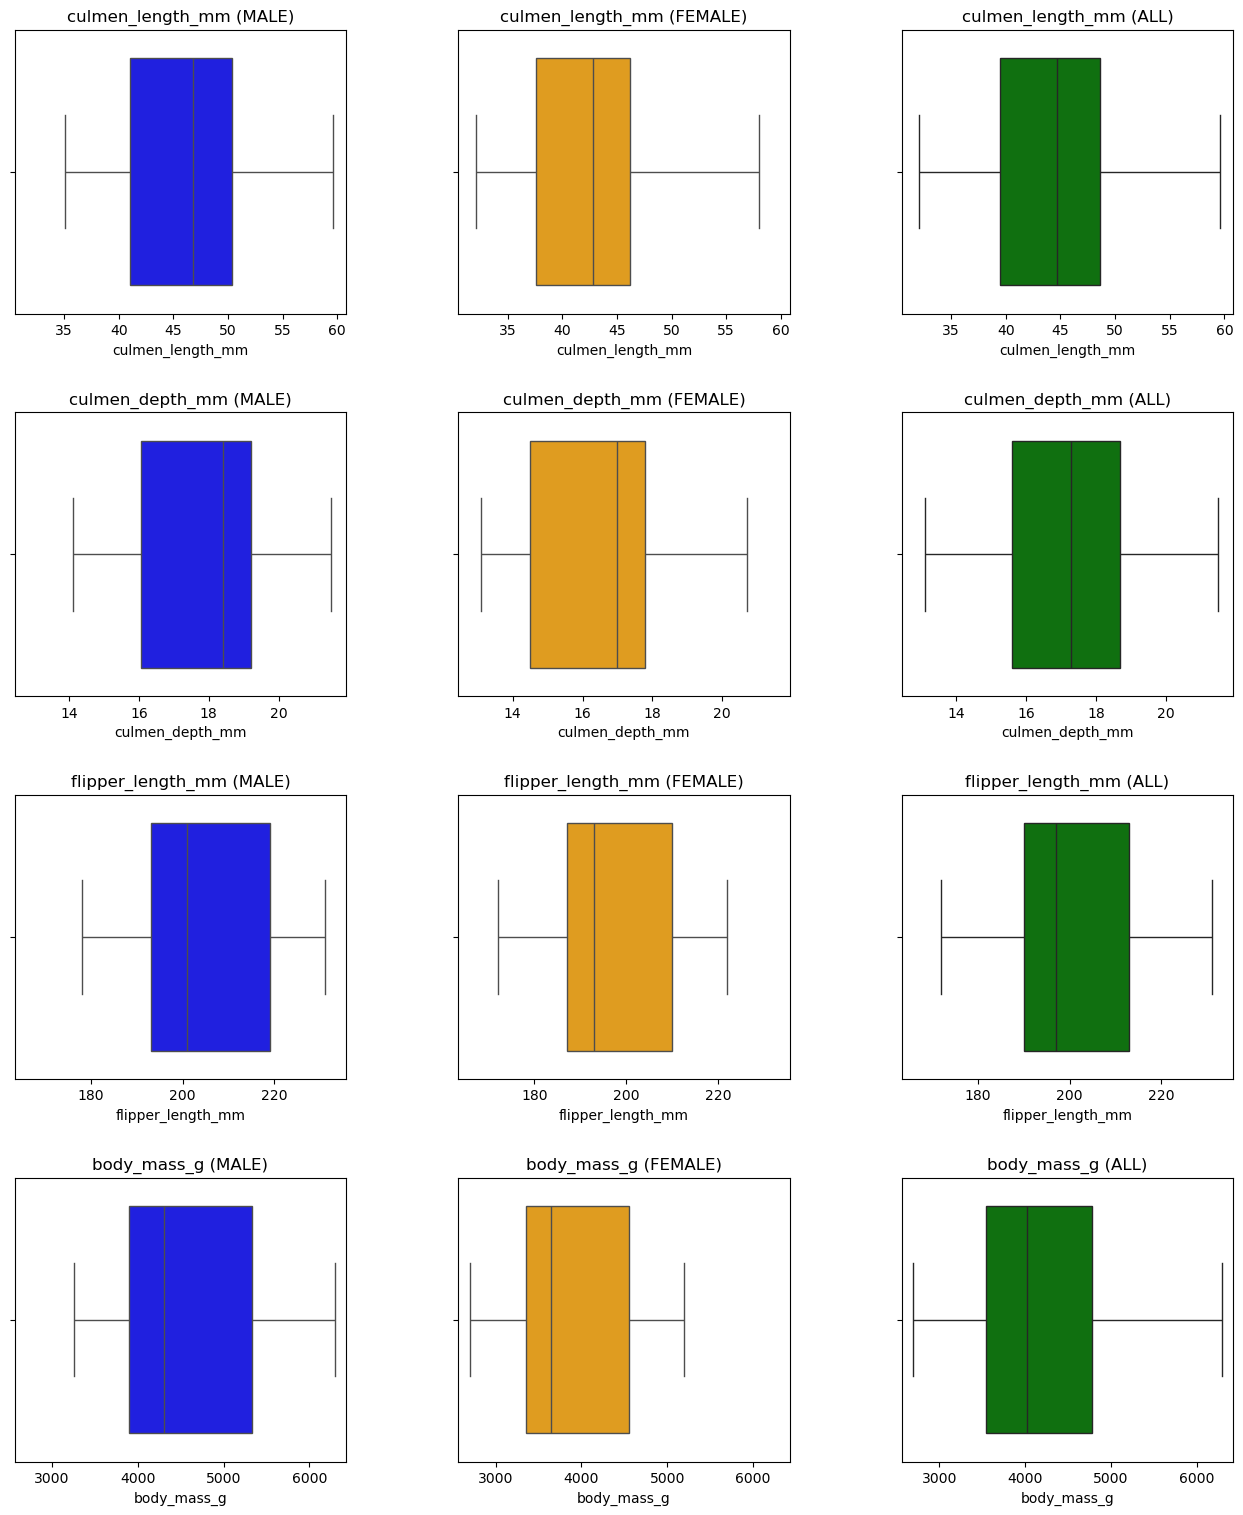

In [36]:
# Criando objetos para plotar os boxplots

fig, ax = plt.subplots(len(features), penguins_df['sex'].nunique()+1, figsize=(14, 16)) 
fig.tight_layout(pad=5)
ax_set_xlim = { 'culmen_length_mm': [penguins_df['culmen_length_mm'].min()*0.95, penguins_df['culmen_length_mm'].max()*1.02],
                'culmen_depth_mm': [penguins_df['culmen_depth_mm'].min()*0.95, penguins_df['culmen_depth_mm'].max()*1.02],
                'flipper_length_mm': [penguins_df['flipper_length_mm'].min()*0.95, penguins_df['flipper_length_mm'].max()*1.02],
                'body_mass_g': [penguins_df['body_mass_g'].min()*0.95, penguins_df['body_mass_g'].max()*1.02]
    }


# Adicionando categoria 'ALL' para contabilizar a distribuição geral na visualização dos boxplots
# Apenas adiciona a categoria 'ALL' e contabiliza todas as entradas de uma vez ao invés de segregar (isso dentro do loop)

sex_categories_plus_all = np.append(penguins_df['sex'].unique(), 'ALL')
for i, feature in enumerate(features):
    for j, sex in enumerate(sex_categories_plus_all):
        axe = ax[i, j]
        color = 'blue'
        penguins_sex_subset = penguins_df[penguins_df['sex'] == sex]
        if sex == 'ALL':
            color = 'green'
            penguins_sex_subset = penguins_df
        elif sex == 'FEMALE':
            color = 'orange'            
        sns.boxplot(x=penguins_sex_subset[feature], ax=axe, color=color)
        axe.set_xlim(ax_set_xlim[feature])
        axe.set_title(f'{feature} ({sex})')


plt.show()

Características Masculinas se mostram levemente superiores às Femininas. Vamos testar essa hipótese para confirmar.

In [ ]:
#  Comparação MALE e FEMALE
# H0: Distribuições são iguais
# H1: Distribuições são diferentes

from scipy.stats import ttest_ind
for feature in features:
    ttest = ttest_ind(penguins_df[penguins_df['sex'] == 'MALE'][feature], penguins_df[penguins_df['sex'] == 'FEMALE'][feature])
    print(f'Característica {feature}: T = {ttest.statistic}, p-value = {ttest.pvalue}')



Característica culmen_length_mm: T = 6.816101569584094, p-value = 4.458310888956517e-11
Característica culmen_depth_mm: T = 7.223012992306065, p-value = 3.5395904316159235e-12
Característica flipper_length_mm: T = 4.814769230513702, p-value = 2.248292028899214e-06
Característica body_mass_g: T = 8.527570011315659, p-value = 5.465793277643544e-16


Conclusões iniciais:

- Não há dados faltantes

- Os dados apresentam uma distribuição bimodais, ou seja, com duas regiões de maior ocorrência de dados, tanto para penguins masculinos quanto para penguins femininos

- Sem outliers

- Características físicas dos penguins do sexo masculino se mostram numericamente maiores que as do sexo feminino (P-Valor < 1e-6) 

## Etapa 2: Pré-processamento dos dados

Criando Dummy_variables para features categóricas (no caso, apenas `sex`)

In [38]:
penguins_dummies = pd.get_dummies(data=penguins_df,columns=['sex'], dtype='int')
penguins_dummies.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


In [39]:
penguins_numeric = penguins_dummies.drop(columns=['sex_FEMALE', 'sex_MALE'])
penguins_numeric.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


Aplicando StandardScaler()

In [46]:
from sklearn.preprocessing import StandardScaler

# Inicializando StandardScaler e aplicando no df com dummies
scaler = StandardScaler()
X = scaler.fit_transform(penguins_numeric)
penguins_numeric_scaled = pd.DataFrame(data=X, columns=penguins_numeric.columns)

penguins_scaled = pd.concat([penguins_numeric_scaled, penguins_dummies[['sex_FEMALE', 'sex_MALE']]], axis=1)
penguins_scaled.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,0,1
1,-0.830434,0.126187,-1.068577,-0.504847,1,0
2,-0.683490,0.432728,-0.426399,-1.187953,1,0
3,-1.344738,1.096901,-0.569105,-0.939551,1,0
4,-0.867170,1.761074,-0.783164,-0.691149,0,1


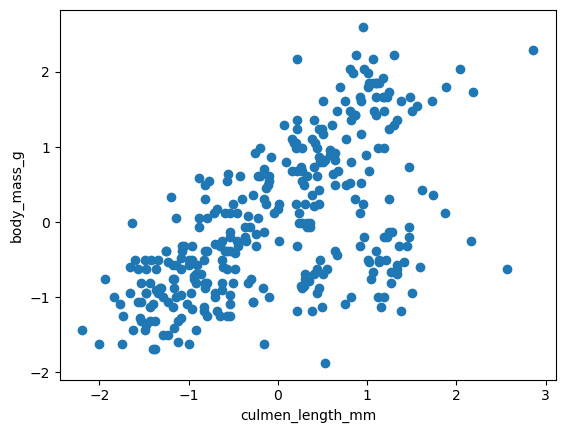

In [47]:
plt.plot(penguins_scaled['culmen_length_mm'], penguins_scaled['body_mass_g'], 'o')
plt.xlabel('culmen_length_mm')
plt.ylabel('body_mass_g')
plt.show()

## Etapa 3: Definindo a quantidade de clusters

Importar KMeans, aplicar KMeans variando n_clusters e obtendo inércia de cada modelo. Visualizar gráfico de Inércia em função de n_clusters e escolher n_clusters

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

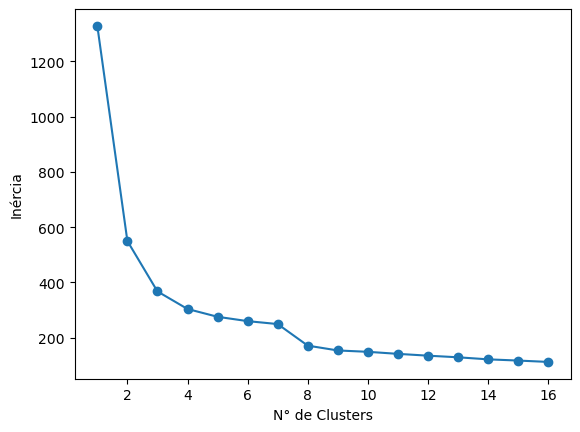

In [51]:
from sklearn.cluster import KMeans

n_clusters = []
inertia = []
for i in range(1, 17):
    kmeans_test = KMeans(n_clusters=i, random_state=42)
    kmeans_test.fit(X)
    n_clusters = np.append(n_clusters, i)
    inertia = np.append(inertia, kmeans_test.inertia_)
    
plt.plot(n_clusters, inertia, marker='o')
plt.xlabel('N° de Clusters')
plt.ylabel('Inércia')
plt.show()


Inércia desce acentuadamente até n=4, onde então tem uma redução cada vez menor. Portanto, pela eurística define-se n_clusters=4. 

No entanto, vemos que há uma segunda descida em n_clusters = 8, argumentavelmente representando que a melhor segregação seria segregar em **Características físicas e Sexo Simultâneamente**.

Como a redução de inércia não se mostra tão significativa entre 4 e 8 clusters, e como inferimos que essa diferença ocorre devido à variações pelo sexo, iremos à priore utilizar n_clusters=4.

## Etapa 4: Aplicando modelo com n_clusters=4

In [54]:
n_clusters_optimal = 4

kmeans = KMeans(n_clusters=n_clusters_optimal, random_state=42)
kmeans.fit(X)

penguins_df['cluster'] = kmeans.labels_
penguins_df


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,39.1,18.7,181.0,3750.0,MALE,2
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
3,36.7,19.3,193.0,3450.0,FEMALE,2
4,39.3,20.6,190.0,3650.0,MALE,0
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,FEMALE,1
328,46.8,14.3,215.0,4850.0,FEMALE,1
329,50.4,15.7,222.0,5750.0,MALE,1
330,45.2,14.8,212.0,5200.0,FEMALE,1


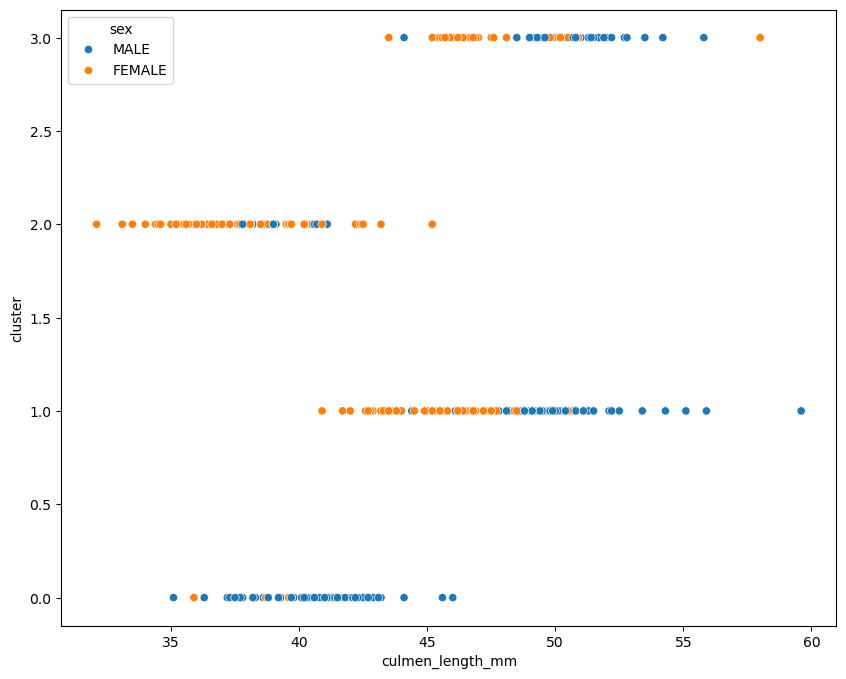

In [55]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=penguins_df, x='culmen_length_mm', y='cluster', hue='sex')
plt.show()

## Etapa 5: Retornando resultados

In [16]:
stat_penguins = penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','cluster']].groupby('cluster').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
cluster,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984


## Clusterizando para n_clusters = 8 e comparando os resultados

In [56]:
n_clusters_optimal = 8

kmeans = KMeans(n_clusters=n_clusters_optimal, random_state=42)
kmeans.fit(X)

penguins_df['cluster'] = kmeans.labels_
penguins_df

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,39.1,18.7,181.0,3750.0,MALE,7
1,39.5,17.4,186.0,3800.0,FEMALE,4
2,40.3,18.0,195.0,3250.0,FEMALE,4
3,36.7,19.3,193.0,3450.0,FEMALE,7
4,39.3,20.6,190.0,3650.0,MALE,7
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,FEMALE,1
328,46.8,14.3,215.0,4850.0,FEMALE,1
329,50.4,15.7,222.0,5750.0,MALE,3
330,45.2,14.8,212.0,5200.0,FEMALE,1


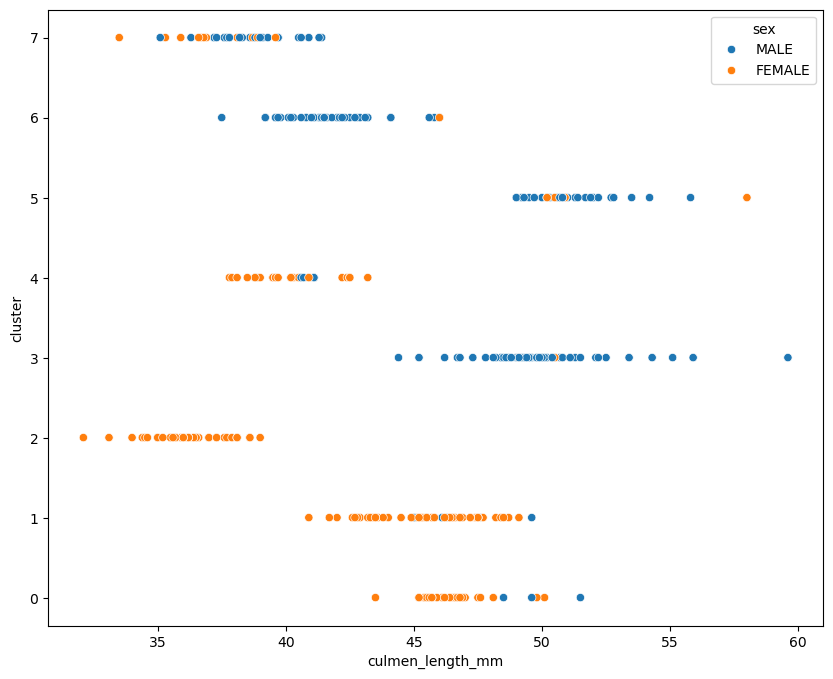

In [57]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=penguins_df, x='culmen_length_mm', y='cluster', hue='sex')
plt.show()

Comparando os Scatterplots entre os penguins, podemos visualizar que há uma diferença na frequência de sexo em cada cluster, o que é um forte ponto argumentativo de que a clusterização realizada em n_clusters = 8 evidencia de fato a segregação entre penguins macho e fêmeas.

# Solução do Problema (Gabarito)

In [17]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1 - Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()
penguins_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [18]:
# Step 2 - Perform preprocessing steps on the dataset to create dummy variables
# Convert categorical variables into dummy/indicator variables
penguins_df = pd.get_dummies(penguins_df, dtype='int') # dtype='int' ensure the output will be 0/1 instead of True/False
penguins_df


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,1,0
328,46.8,14.3,215.0,4850.0,1,0
329,50.4,15.7,222.0,5750.0,0,1
330,45.2,14.8,212.0,5200.0,1,0


In [19]:

# Step 3 - Perform preprocessing steps on the dataset - standarizing/scaling
# Scaling variables (also called standardizing) is recommended before performing a clustering algorithm since this can increase the performance greatly (see https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_df.columns)
penguins_preprocessed.head(10)



,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

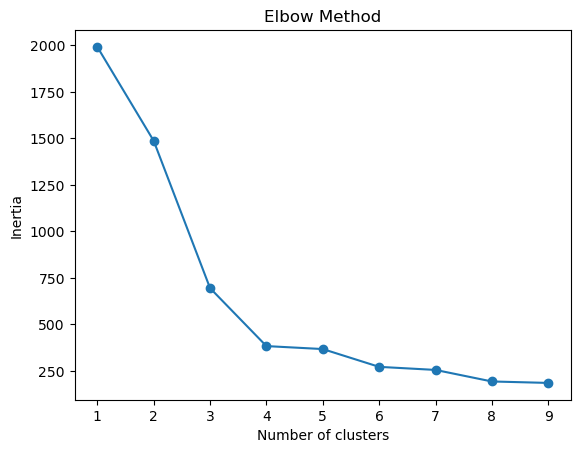

In [20]:
# Step 4 - Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4



c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


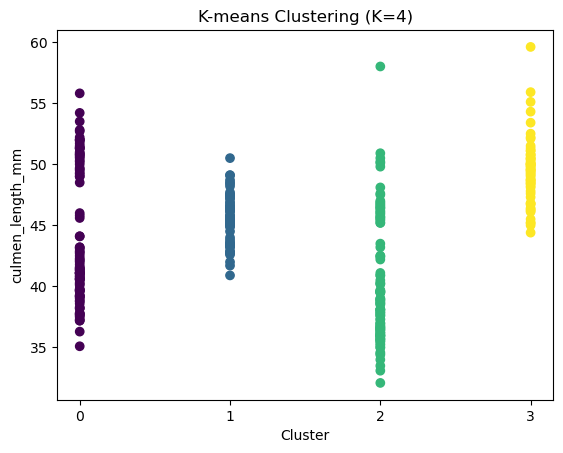

In [21]:
# Step 5 - Run the k-means clustering algorithm
# with the optimal number of clusters 

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()



In [22]:
# Step - create final `stat_penguins` DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984
